Breast Cancer Prediction using Random Forest Classifier
Description:
This program allows users to input 30 tumor features and predicts whether the tumor is Malignant (0) or Benign (1),
along with the prediction confidence. It uses the built-in Breast Cancer dataset from scikit-learn.


---

Author:  Nishant Tripathi and Divyansh Tripathi

Date: 2 july 2025


In [24]:
# 1.Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
 #2.Load and Prepare Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = Malignant, 1 = Benign

X = df.drop('target', axis=1)
y = df['target']


In [26]:
#3.Split Dataset (Train)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [27]:
#4.Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
#5.Train the Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [29]:
#6.Evaluate Model Performance
print("\n Classification Report:\n")
print(classification_report(y_test, model.predict(X_test_scaled)))


 Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



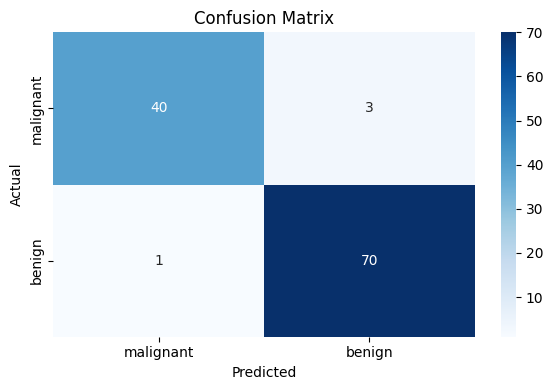

In [30]:
#7.Confusion Matrix Heatmap
cm = confusion_matrix(y_test, model.predict(X_test_scaled))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Enter tumor features (30 values):
Format: Comma-separated (no spaces)
Example: 13.54,14.36,87.46,566.3,...
Enter 30 values: 17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871, 1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193, 25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189

 Prediction: Malignant (0)
 Confidence: 96.0 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


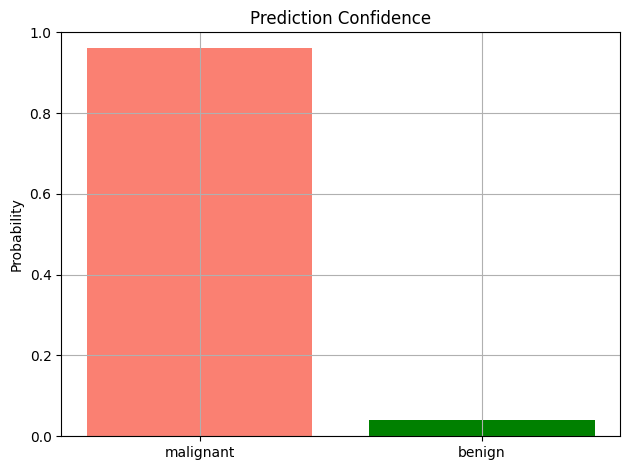

In [31]:
# 7.Take User Input for Prediction
print("Enter tumor features (30 values):")
print("Format: Comma-separated (no spaces)")
print("Example: 13.54,14.36,87.46,566.3,...")

try:
    input_str = input("Enter 30 values: ")
    input_list = list(map(float, input_str.strip().split(',')))

    if len(input_list) != 30:
        raise ValueError("You must enter exactly 30 values.")

    # Prepare input
    input_array = np.array(input_list).reshape(1, -1)
    input_scaled = scaler.transform(input_array)

    # Predict
    prediction = model.predict(input_scaled)[0]
    proba = model.predict_proba(input_scaled)[0]

    result = "Benign (1)" if prediction == 1 else "Malignant (0)"
    confidence = round(proba[prediction] * 100, 2)

    print(f"\n Prediction: {result}")
    print(f" Confidence: {confidence} %")

    #Probability Bar Chart
    labels = data.target_names
    plt.bar(labels, proba, color=['salmon', 'green'])
    plt.title("Prediction Confidence")
    plt.ylabel("Probability")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

except ValueError as ve:
    print(f"\n Input Error: {ve}")
except Exception as ex:
    print(f"\n Unexpected Error: {ex}")

These are some data entry you can test this model by yourself. These are data set from GPT you can also go on gpt ask the data and test here


Sample 1 — Malignant (0)

17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,
1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,
25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189

Sample 2 — Benign (1)

13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,
0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01498,0.018,0.002498,
15.11,19.26,99.7,689.5,0.1405,0.173,0.1362,0.08669,0.2102,0.06784

 Sample 3 — Malignant (0)

19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1237,0.2198,0.06325,
0.7572,0.7813,5.438,94.44,0.01149,0.02461,0.05688,0.01885,0.01756,0.005115,
25.22,24.91,166.2,2027.0,0.1449,0.4245,0.4504,0.243,0.3613,0.09564


 Sample 4 — Benign (1)

12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,
0.3345,1.105,2.148,27.1,0.00751,0.03345,0.03672,0.01137,0.02165,0.004784,
14.5,22.47,96.09,641.2,0.1641,0.611,0.6335,0.1703,0.3871,0.0974


 Sample 5 — Malignant (0)
20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,0.05883,
1.377,1.326,8.61,201.0,0.01037,0.02277,0.04887,0.01587,0.0188,0.003494,
28.01,19.53,187.6,2499.0,0.1482,0.3735,0.4896,0.1703,0.3512,0.09251
